# Kobe Brunetti

## Kobe's Research Interests: Company financial reports and trend predictions

My research is going to be focused on analyzing the correlation between unemployment rates, historical sales, and other Walmart operating factors to see if viable predictions can be made about the company's future sales. My research question is, **Can Walmart's future sale predictions be accurately made using estimates based off the market's fuel price, past historical sales, and unemployment rates?**

Company trend predictions are interesting and important because by understanding sale trends and consumer shifts, businesses can both capture market opportunities and orgainze their operations most efficiently. To acheive my research on Walmart's sales trends, I need to clean the database by removing some of the insignificant columns such as the Temperature. I could also summarize the weekly data rows into a monthly based system for further simplification. Since the data is for the years of 2010 to 2012, I can compare my sale predictions for 2013 with Walmart's actual sales in 2013, in order to see how accurate my analysis was. 

In [ ]:
import pandas as pd

KBdf = pd.read_csv('../data/raw/Walmart.csv')
KBdf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Dataset Components:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
KBdf.shape

(6435, 8)

In [ ]:
KBdf.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
KBdf.nunique(axis=0)
KBdf.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


### Dataset Cleaning:

In [ ]:
KBdf_cleaned = KBdf.copy().drop(['Holiday_Flag','Temperature','CPI'], axis=1)
KBdf_cleaned.head(100)

,Store,Date,Weekly_Sales,Fuel_Price,Unemployment
0,1,05-02-2010,1643690.90,2.572,8.106
1,1,12-02-2010,1641957.44,2.548,8.106
2,1,19-02-2010,1611968.17,2.514,8.106
3,1,26-02-2010,1409727.59,2.561,8.106
4,1,05-03-2010,1554806.68,2.625,8.106
...,...,...,...,...,...
95,1,02-12-2011,1584083.95,3.172,7.866
96,1,09-12-2011,1799682.38,3.158,7.866
97,1,16-12-2011,1881176.67,3.159,7.866
98,1,23-12-2011,2270188.99,3.112,7.866


In [ ]:
KBdf_cleaned['Weekly Sales Rate of Change'] = KBdf_cleaned['Weekly_Sales'].pct_change()
KBdf_cleaned.head(100)

,Store,Date,Weekly_Sales,Fuel_Price,Unemployment,Weekly Sales Rate of Change
0,1,05-02-2010,1643690.90,2.572,8.106,NaN
1,1,12-02-2010,1641957.44,2.548,8.106,-0.001055
2,1,19-02-2010,1611968.17,2.514,8.106,-0.018264
3,1,26-02-2010,1409727.59,2.561,8.106,-0.125462
4,1,05-03-2010,1554806.68,2.625,8.106,0.102913
...,...,...,...,...,...,...
95,1,02-12-2011,1584083.95,3.172,7.866,-0.220937
96,1,09-12-2011,1799682.38,3.158,7.866,0.136103
97,1,16-12-2011,1881176.67,3.159,7.866,0.045283
98,1,23-12-2011,2270188.99,3.112,7.866,0.206792


### Exploratory Visualizations:

<seaborn.axisgrid.FacetGrid>

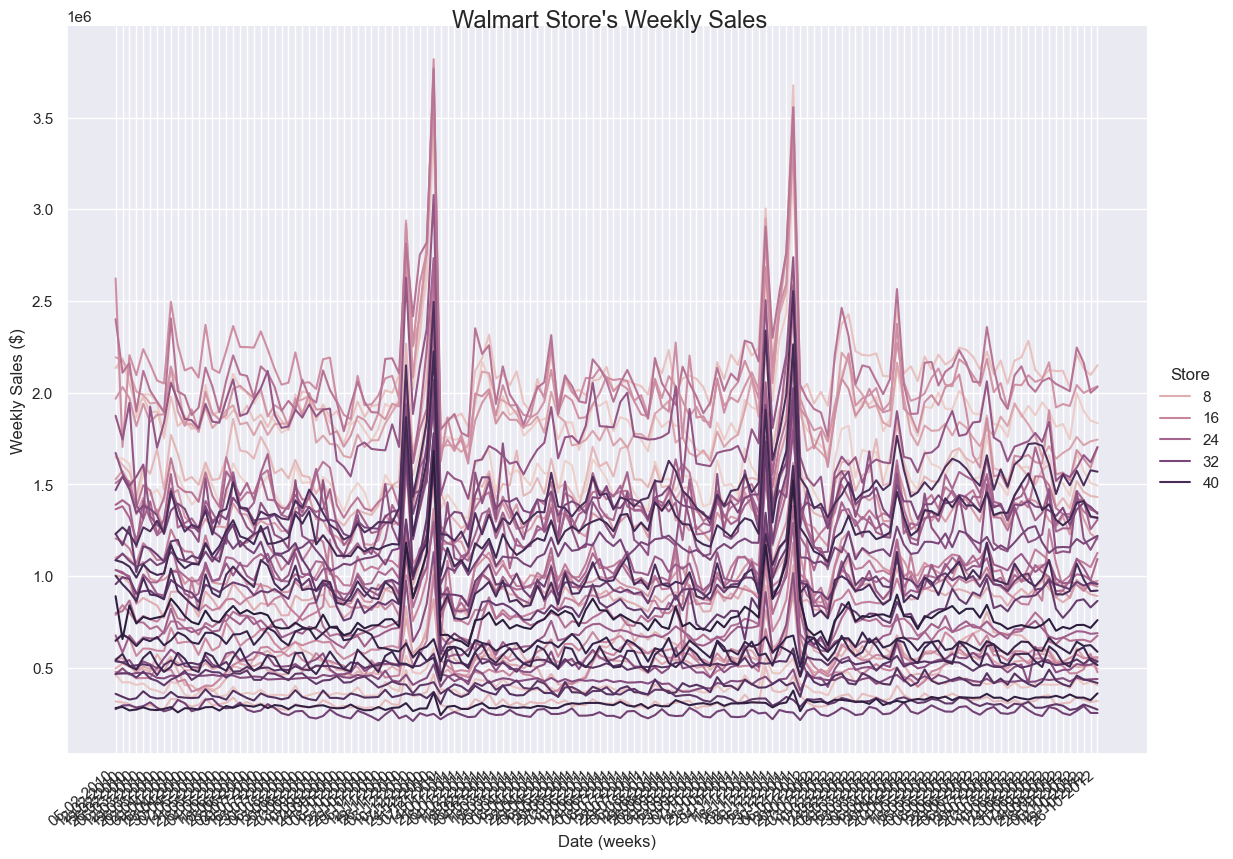

In [ ]:

plot1=sns.relplot(
    data=KBdf_cleaned, kind="line",
    x="Date", y="Weekly_Sales",
    hue="Store", height=8.27, aspect=11.7/8.27,
    facet_kws=dict(sharex=False),
)

plot1.set_xticklabels(rotation=40, ha="right")
plot1.fig.suptitle("Walmart Store's Weekly Sales",
                  fontsize=17, fontdict={"weight": "bold"})
plot1.set(xlabel='Date (weeks)', ylabel='Weekly Sales ($)')



<seaborn.axisgrid.FacetGrid>

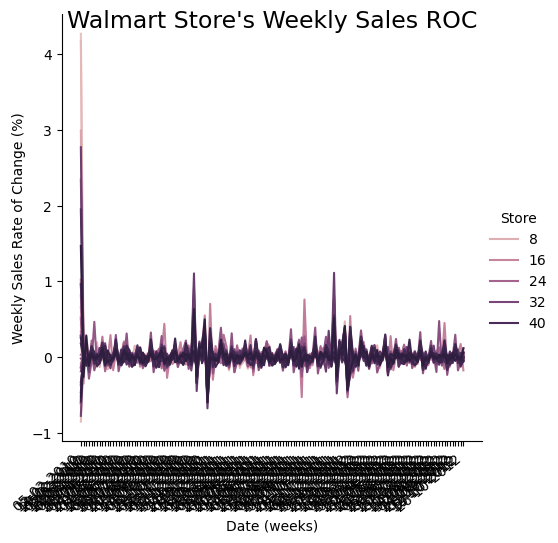

In [ ]:
plot1=sns.relplot(
    data=KBdf_cleaned, kind="line",
    x="Date", y="Weekly Sales Rate of Change",
    hue="Store",
    facet_kws=dict(sharex=False),
)
plot1.set_xticklabels(rotation=40, ha="right")
plot1.fig.suptitle("Walmart Store's Weekly Sales ROC",
                  fontsize=17, fontdict={"weight": "bold"})
plot1.set(xlabel='Date (weeks)', ylabel='Weekly Sales Rate of Change (%)')

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

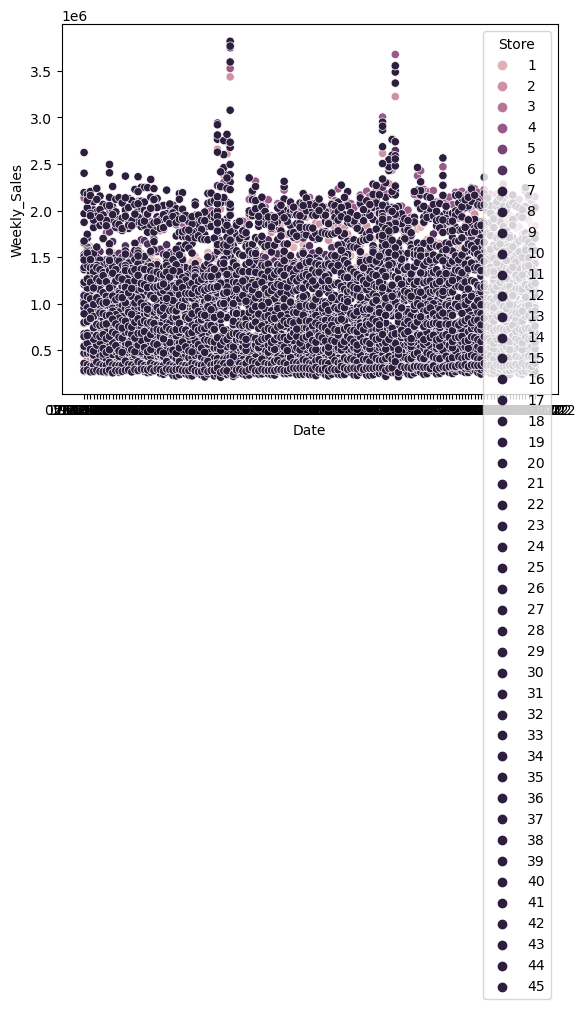

In [ ]:
sns.scatterplot(
    data=KBdf_cleaned, x="Date", y="Weekly_Sales", hue="Store",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)

<seaborn.axisgrid.FacetGrid>

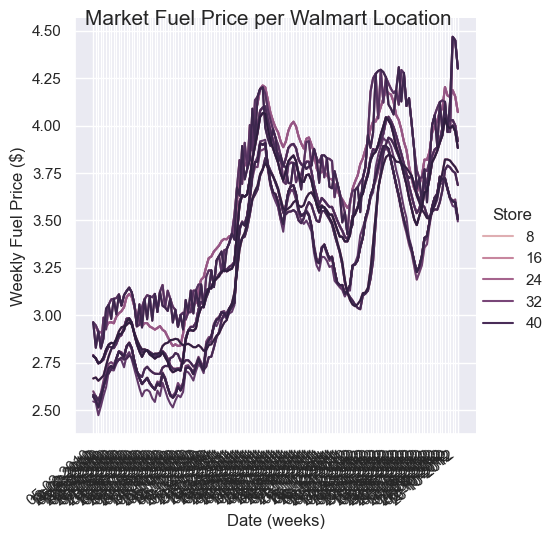

In [ ]:
plot2=sns.relplot(
    data=KBdf_cleaned, kind="line",
    x="Date", y="Fuel_Price",
    hue="Store",
    facet_kws=dict(sharex=False),
)
plot2.set_xticklabels(rotation=40, ha="right")
plot2.fig.suptitle("Market Fuel Price per Walmart Location",
                  fontsize=15, fontdict={"weight": "bold"})
plot2.set(xlabel='Date (weeks)', ylabel='Weekly Fuel Price ($)')

<seaborn.axisgrid.FacetGrid>

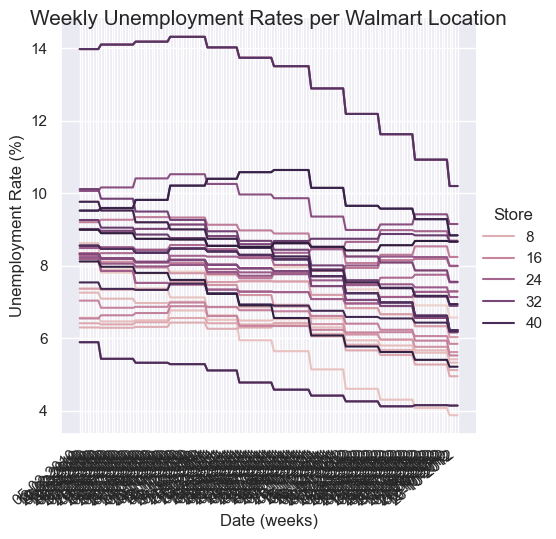

In [ ]:
plot3=sns.relplot(
    data=KBdf_cleaned, kind="line",
    x="Date", y="Unemployment",
    hue="Store",
    facet_kws=dict(sharex=False),
)
plot3.set_xticklabels(rotation=40, ha="right")
plot3.fig.suptitle("Weekly Unemployment Rates per Walmart Location",
                  fontsize=15, fontdict={"weight": "bold"})
plot3.set(xlabel='Date (weeks)', ylabel='Unemployment Rate (%)')